Settings

In [1]:
training_data = "../downloads/r2_train"
testing_data = "../downloads/r2_test"
model_path = './video_classification_model.pkl'
label_map_path = './label_map.pkl'

## Train the model

In [ ]:
import histogramModel as histoModel #extract_color_histogram, process_class_folder, load_data, train_model, classify_videos
from tqdm import tqdm_notebook
data, labels, label_map = histoModel.load_data(training_data, tqdm=tqdm_notebook)
model = histoModel.train_model(data, labels)

y_pred = model.predict(data)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, y_pred)
print(f"Model accuracy (on the test data): {accuracy * 100:.2f}%")

#### Save the model

In [ ]:
# Save the trained model and label map to files
import joblib
joblib.dump(model, 'video_classification_model.pkl')
joblib.dump(label_map, 'label_map.pkl')

print("Model trained and saved as 'video_classification_model.pkl'.")
print("Label map saved as 'label_map.pkl'.")

#### Load the model

In [2]:
import joblib
model = joblib.load(model_path)
label_map = joblib.load(label_map_path)

## Test the model

You can "Execute cell and below"

In [8]:
import histogramModel as histoModel #extract_color_histogram, process_class_folder, load_data, train_model, classify_videos
from concurrent.futures import ThreadPoolExecutor

# Classify videos and get true and predicted labels
from tqdm import tqdm_notebook
true_labels, predicted_labels = histoModel.classify_videos(testing_data, model, label_map, tqdm=tqdm_notebook)

# Calculate and print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Classification accuracy: {accuracy * 100:.2f}%")

Processing videos:   0%|          | 0/3354 [00:00<?, ?it/s]


Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating

Accurate! ✅ Eating Eating



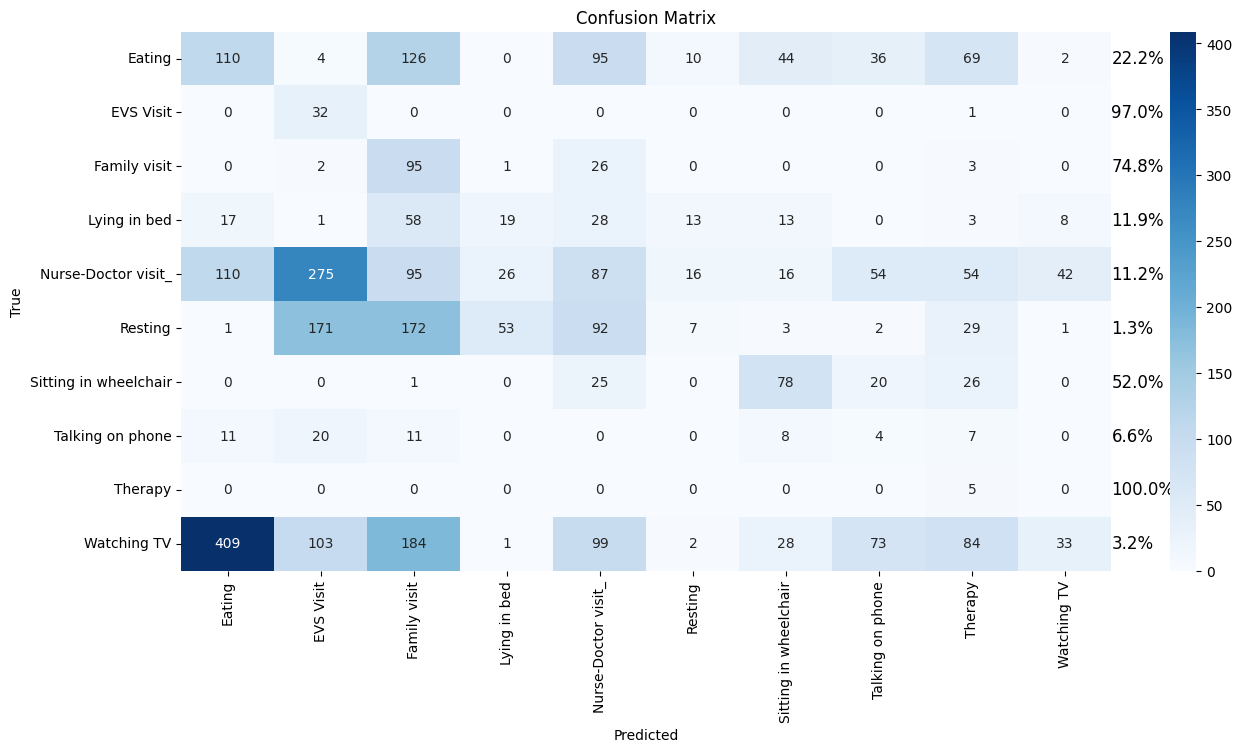

In [17]:
import os
import numpy as np
def plot_confusion_matrix(true_labels, predicted_labels):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15, 7))
    import seaborn as sns
    class_names = os.listdir(testing_data)
    sns.heatmap(cm, xticklabels=os.listdir(testing_data), yticklabels=class_names, annot=True, fmt='d', cmap='Blues')

    # Calculate accuracy for each row
    row_sums = cm.sum(axis=1)
    correct_predictions = np.diag(cm)
    row_accuracies = correct_predictions / row_sums
    
    # Annotate the heatmap with row accuracies
    for i, accuracy in enumerate(row_accuracies):
        plt.text(len(class_names), i + .5, f'{accuracy * 100.0:.1f}%', va='center', ha='left', color='black', fontsize=12)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix heatmap
plot_confusion_matrix(true_labels, predicted_labels)

In [4]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are your true and predicted labels
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.17      0.22      0.19       496
           1       0.00      0.00      0.00         0
           2       0.13      0.75      0.22       127
           3       0.19      0.12      0.15       160
           4       0.19      0.11      0.14       775
           5       0.15      0.01      0.02       531
           6       0.41      0.52      0.46       150
           7       0.02      0.07      0.03        61
           8       0.02      1.00      0.04         5
           9       0.38      0.03      0.06      1016

    accuracy                           0.13      3321
   macro avg       0.17      0.28      0.13      3321
weighted avg       0.24      0.13      0.12      3321



c:\Users\lsm0147\Documents\activity-recog\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lsm0147\Documents\activity-recog\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lsm0147\Documents\activity-recog\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu